## Importing the libraries

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Analysing the training data

In [61]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv", parse_dates=True)

In [63]:
dataset_train['Date'] = pd.to_datetime(dataset_train['Date'])

In [65]:
dataset_train.set_index('Date', inplace=True)

In [131]:
dataset_train.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [67]:
dataset_train.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"
2016-12-29,783.33,785.93,778.92,782.79,"744,300"
2016-12-30,782.75,782.78,770.41,771.82,"1,770,000"


In [79]:
dataset_train.dtypes

Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [68]:
dataset_train.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [69]:
dataset_train.shape

(1258, 5)

In [70]:
dataset_train.isnull().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

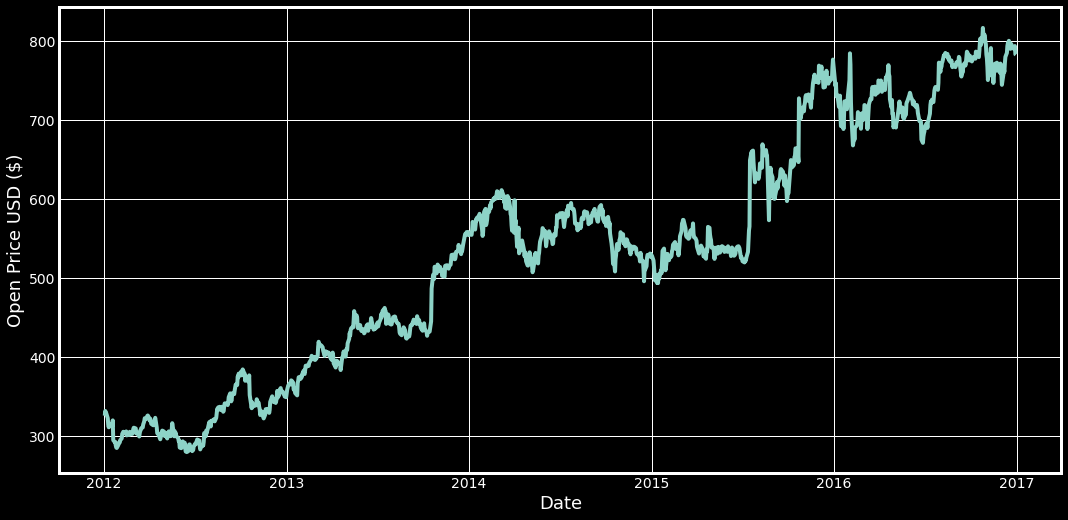

In [117]:
plt.style.use('dark_background')
plt.figure(figsize=(16,8))
plt.plot(dataset_train['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()

#### Candlestick chart for the first month

In [72]:
! pip install mplfinance

Defaulting to user installation because normal site-packages is not writeable


In [73]:
import mplfinance as mpf

In [146]:
df = dataset_train[['Open', 'High', 'Low', 'Close']]

In [147]:
df

,Open,High,Low,Close
Date,,,,
2012-01-03,325.25,332.83,324.97,663.59
2012-01-04,331.27,333.87,329.08,666.45
2012-01-05,329.83,330.75,326.89,657.21
2012-01-06,328.34,328.77,323.68,648.24
2012-01-09,322.04,322.29,309.46,620.76
...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91
2016-12-27,790.68,797.86,787.66,791.55
2016-12-28,793.70,794.23,783.20,785.05


In [148]:
df.dtypes

Open     float64
High     float64
Low      float64
Close     object
dtype: object

In [149]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6056\3911803222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = pd.to_numeric(df['Close'], errors='coerce')


In [150]:
df.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [160]:
x = df['2012-01':'2012-02']

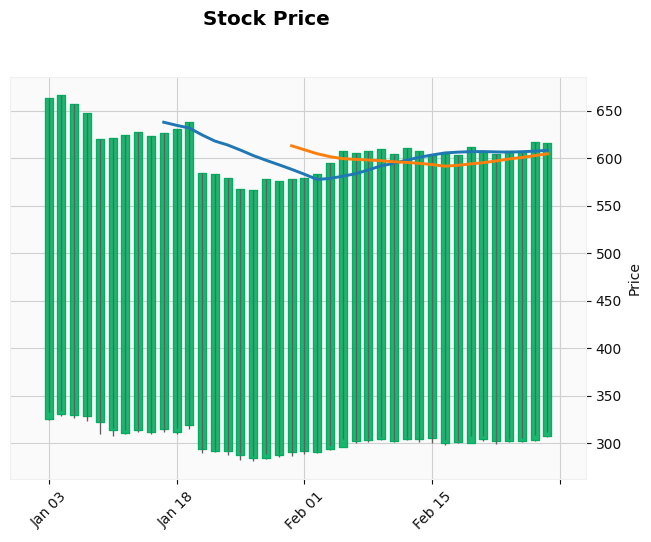

In [161]:
mpf.plot(x, type='candle', title='Stock Price', ylabel='Price', style='yahoo', mav=(10, 20))

#### Rolling mean

In [168]:
window_size = 10
rolling_mean = df['Open'].rolling(window=window_size).mean()

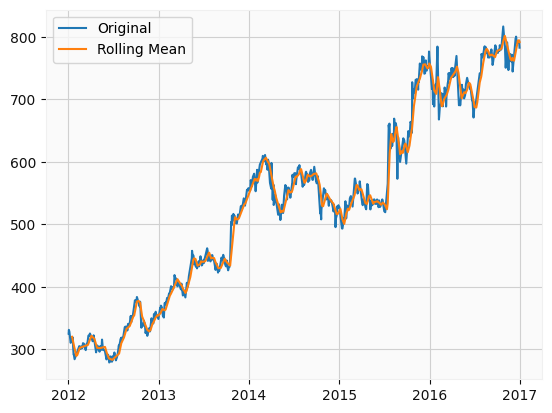

In [169]:
plt.plot(df['Open'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.legend()
plt.show()

#### Rolling standard deviation

In [170]:
rolling_std = df['Open'].rolling(window=window_size).std()

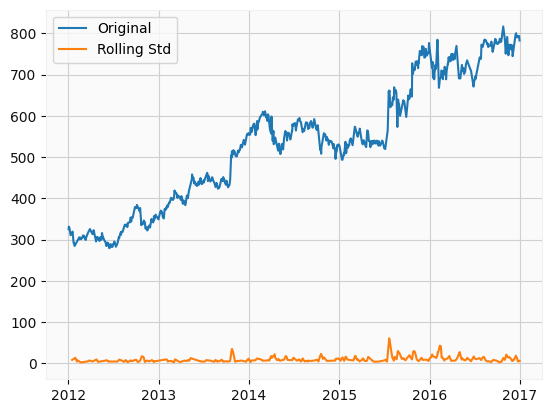

In [171]:
plt.plot(df['Open'], label='Original')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.show()

#### Calculating Bollinger Bands

In [172]:
num_std = 2 
upper_band = rolling_mean + (rolling_std * num_std)
lower_band = rolling_mean - (rolling_std * num_std)

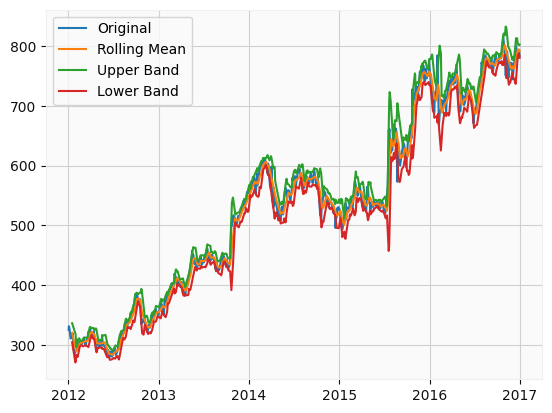

In [173]:
plt.plot(df['Open'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(upper_band, label='Upper Band')
plt.plot(lower_band, label='Lower Band')
plt.legend()
plt.show()

#### Calculating correlation and visualising

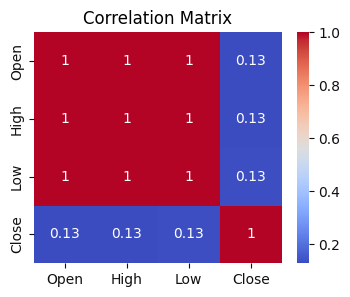

In [181]:
corr_matrix = df.corr()

plt.figure(figsize=(4, 3))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [214]:
dataset_train.reset_index(inplace=True)

In [215]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,2016-12-23,790.90,792.74,787.28,789.91,"623,400"
1254,2016-12-27,790.68,797.86,787.66,791.55,"789,100"
1255,2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"
1256,2016-12-29,783.33,785.93,778.92,782.79,"744,300"


## Dataset for training the model

In [216]:
training_set = dataset_train.iloc[:, 1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


#### Feature scaling

In [217]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [218]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


## Creating a data structure with 60 timesteps and 1 output

In [219]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [220]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [221]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [222]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [223]:
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


## Building and training the LSTM RNN

In [224]:
! pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


#### Importing the Keras libraries and packages

In [225]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### Initialising the RNN

In [226]:
model = Sequential()

#### Adding the first LSTM layer and some Dropout regularisation

In [227]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

#### Adding a second LSTM layer and some Dropout regularisation

In [228]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

#### Adding a third LSTM layer and some Dropout regularisation

In [229]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

#### Adding a fourth LSTM layer and some Dropout regularisation

In [230]:
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

#### Adding the output layer

In [231]:
model.add(Dense(units=1))

#### Compiling the LSTM RNN

In [232]:
model.compile(optimizer="adam", loss="mean_squared_error")

#### Fitting the LSTM RNN to the Training set

In [233]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 17s 131ms/step - loss: 0.0449
Epoch 2/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0051
Epoch 4/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0053
Epoch 11/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0047
Epoch 13/100

38/38 [==============================] - 5s 123ms/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0015


In [234]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

## Making the predictions and visualising the results

#### Getting the real stock price of 2017

In [211]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [212]:
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


#### Getting the predicted stock price of 2017

In [238]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [239]:
print(dataset_total)

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64


In [240]:
print(inputs)

[[0.9299055 ]
 [0.93113327]
 [0.92750577]
 [0.94415507]
 [0.93876032]
 [0.93403527]
 [0.93483518]
 [0.9313937 ]
 [0.94636878]
 [0.96569685]
 [0.97510976]
 [0.95966962]
 [0.97808617]
 [1.        ]
 [0.98076494]
 [0.97083116]
 [0.98450406]
 [0.96054394]
 [0.9371419 ]
 [0.92841729]
 [0.90804747]
 [0.8771858 ]
 [0.92153434]
 [0.93809063]
 [0.93165414]
 [0.95254483]
 [0.88812412]
 [0.88637547]
 [0.87032145]
 [0.88563137]
 [0.90743359]
 [0.91571173]
 [0.89941588]
 [0.91805566]
 [0.9089404 ]
 [0.9024853 ]
 [0.89456061]
 [0.91600938]
 [0.9132934 ]
 [0.88979835]
 [0.86589404]
 [0.89030062]
 [0.90335962]
 [0.89642086]
 [0.91777662]
 [0.93176576]
 [0.94114145]
 [0.95762334]
 [0.96413424]
 [0.96402262]
 [0.96971501]
 [0.95077759]
 [0.96294367]
 [0.96123223]
 [0.95475854]
 [0.95204256]
 [0.95163331]
 [0.95725128]
 [0.93796041]
 [0.93688146]
 [0.92955205]
 [0.94731751]
 [0.94307612]
 [0.96015329]
 [0.98087655]
 [0.98359253]
 [0.97827219]
 [0.98225314]
 [0.98288563]
 [0.98214153]
 [0.979779  ]
 [0.97

In [241]:
print(X_test)

[[[0.9299055 ]
  [0.93113327]
  [0.92750577]
  ...
  [0.95725128]
  [0.93796041]
  [0.93688146]]

 [[0.93113327]
  [0.92750577]
  [0.94415507]
  ...
  [0.93796041]
  [0.93688146]
  [0.92955205]]

 [[0.92750577]
  [0.94415507]
  [0.93876032]
  ...
  [0.93688146]
  [0.92955205]
  [0.94731751]]

 ...

 [[0.96054394]
  [0.9371419 ]
  [0.92841729]
  ...
  [1.01045465]
  [1.02407173]
  [1.03930724]]

 [[0.9371419 ]
  [0.92841729]
  [0.90804747]
  ...
  [1.02407173]
  [1.03930724]
  [1.03354044]]

 [[0.92841729]
  [0.90804747]
  [0.8771858 ]
  ...
  [1.03930724]
  [1.03354044]
  [0.99624228]]]


In [242]:
print(predicted_stock_price)

[[779.81274]
 [777.0786 ]
 [776.96326]
 [778.0015 ]
 [780.86456]
 [786.1305 ]
 [791.1641 ]
 [793.4695 ]
 [794.05054]
 [794.01654]
 [793.8989 ]
 [793.7223 ]
 [793.599  ]
 [794.10474]
 [795.0187 ]
 [799.1488 ]
 [805.4349 ]
 [812.26965]
 [816.2154 ]
 [812.9374 ]]


### Getting the RMSE

In [243]:
rmse =np.sqrt(np.mean(predicted_stock_price - real_stock_price)**2)
rmse

14.130919433593743

## Visualising the results

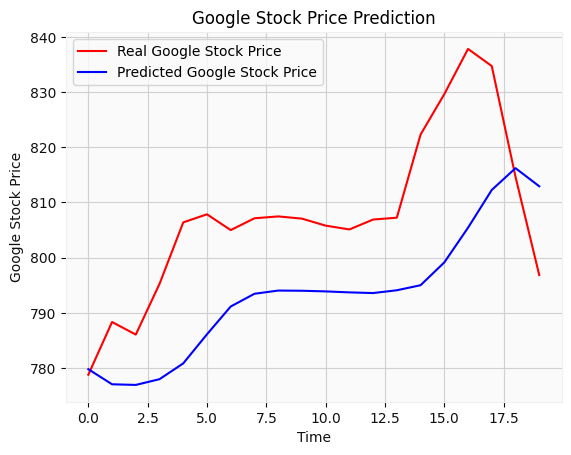

In [244]:
plt.plot(real_stock_price, color="red", label="Real Google Stock Price")
plt.plot(predicted_stock_price, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()